In [ ]:
import pandas as pd
import numpy as np
import seaborn as srn
import matplotlib.pyplot as plt

In [ ]:
#Baixando o arquivo:
df = pd.read_csv("Human_Resources.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Não há dados faltantes!

# Panorama geral:

## Dicionário de dados:

1.   Age: Idade
2.   Attrition: Colaborador saiu ou não saiu?
*   0-Não
*   1-Sim

3.   BusinessTravel:Frequência de viagem de um colaborador
4.   Department: Departamento do colaborador
5.   DistanceFromHome: Distância entre casa e trabalho
6.   EducationField: Campo de educação. Qual área o colaborador estudou?
7.   EmployeeNumber: Número do colaborador
8.   EnvironmentSatisfaction: Satisfação do ambiente de trabalho:
*   1-Low
*   2-Medium
*   3-High
*   4-Very High
9.   Gender: Gênero
10.  MartialStatus: Estado civil
11.  MonthlyIncome: Renda mensal em USD
12.  NumCompaniesWorked: Número de empresas que já trabalhou
13.  OverTime: O colaborador faz hora extra?
14.  PercentSalaryHike: Média de aumento de salário anual
15.  StockOptionLevel: Ações da empresa dadas a um funcionário:
*   0-No Stocks
*   1-Less Stocks
*   2-Moderate Stocks
*   3-A lot of stocks
16.  TotalWorkingYears: Total anos de experiência trabalhados
17.  TrainingTimesLastYear: Número de treinamentos que o colaborador fez
18.  YearsAtCompany: Anos trabalhados na empresa
19.  YearsInCurrentRole: Anos na atual função
20.  YearsSinceLastPromotion: Número de anos desde última promoção
21.  YearsWithCurrManager: Anos trabalhados com o atual gerente
22.  Education: Educação
*   1-Bellow College
*   2-College
*   3-Bachelor
*   4-Master
*   5-Doctor
23.  JobEnvolviment: Envolvimento no trabalho.
*   1-Low
*   2-Medium
*   3-High
*   4-Very High
24.   JobSatisfaction: Satisfação no trabalho.
*   1-Low
*   2-Medium
*   3-High
*   4-Very high
25.   PerformanceRating: Nota de performance.
*   1-Low
*   2-Good
*   3-Excellent
*   4-Outstanding

## Medida de desempenho:

  O objetivo do projeto é prever colaboradores com tendência de sair da empresa e assim diminuir o TurnAround. Sendo assim, a medida de desempenho mais importante será Recall pois ele mede a taxa de verdadeiros positivos.
  As métricas serão utilizadas na seguinte prioridade:

1.   ROC AUC
2.   Trade-off entre Precision/Recall

# Exploração de dados:

In [ ]:
pd.set_option("display.max_columns", None)

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


É sabido que um dos motivos de um colaborador sair de um empresa é se faz ou não horas extras (OverTime).

In [ ]:
#Separando dados de treinamento e dados de teste:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df["OverTime"]):
  strat_train_set = df.loc[train_index]
  strat_test_set = df.loc[test_index]

In [ ]:
#Verificando estratificação da amostra de teste:
strat_test_set["OverTime"].value_counts()/len(strat_test_set)

No     0.717687
Yes    0.282313
Name: OverTime, dtype: float64

In [ ]:
#Verificando estratificação do conjunto de dados:
df["OverTime"].value_counts()/len(df)

No     0.717007
Yes    0.282993
Name: OverTime, dtype: float64

Amostra de teste ok!

In [ ]:
df = strat_train_set

In [ ]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
819,28,No,Travel_Rarely,1451,Research & Development,2,1,Life Sciences,1,1136,1,Male,67,2,1,Research Scientist,2,Married,3201,19911,0,Y,No,17,3,1,80,0,6,2,1,5,3,0,4
688,19,Yes,Travel_Rarely,419,Sales,21,3,Other,1,959,4,Male,37,2,1,Sales Representative,2,Single,2121,9947,1,Y,Yes,13,3,2,80,0,1,3,4,1,0,0,0
210,32,Yes,Travel_Rarely,1045,Sales,4,4,Medical,1,291,4,Male,32,1,3,Sales Executive,4,Married,10400,25812,1,Y,No,11,3,3,80,0,14,2,2,14,8,9,8
681,38,No,Travel_Rarely,1333,Research & Development,1,3,Technical Degree,1,950,4,Female,80,3,3,Research Director,1,Married,13582,16292,1,Y,No,13,3,2,80,1,15,3,3,15,12,5,11
1195,49,No,Travel_Rarely,809,Research & Development,1,3,Life Sciences,1,1677,3,Male,36,3,4,Manager,3,Single,15379,22384,4,Y,No,14,3,1,80,0,23,2,3,8,7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016,31,Yes,Travel_Rarely,202,Research & Development,8,3,Life Sciences,1,1433,1,Female,34,2,1,Research Scientist,2,Single,1261,22262,1,Y,No,12,3,3,80,0,1,3,4,1,0,0,0
494,34,No,Travel_Rarely,204,Sales,14,3,Technical Degree,1,666,3,Female,31,3,1,Sales Representative,3,Divorced,2579,2912,1,Y,Yes,18,3,4,80,2,8,3,3,8,2,0,6
1350,27,No,Travel_Rarely,511,Sales,2,2,Medical,1,1898,1,Female,89,4,2,Sales Executive,3,Single,6500,26997,0,Y,No,14,3,2,80,0,9,5,2,8,7,0,7
1389,31,No,Travel_Frequently,1125,Research & Development,1,3,Life Sciences,1,1956,4,Male,48,1,2,Research Scientist,1,Married,5003,5771,1,Y,No,21,4,2,80,0,10,6,3,10,8,8,7


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1176 entries, 819 to 795
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1176 non-null   int64 
 1   Attrition                 1176 non-null   object
 2   BusinessTravel            1176 non-null   object
 3   DailyRate                 1176 non-null   int64 
 4   Department                1176 non-null   object
 5   DistanceFromHome          1176 non-null   int64 
 6   Education                 1176 non-null   int64 
 7   EducationField            1176 non-null   object
 8   EmployeeCount             1176 non-null   int64 
 9   EmployeeNumber            1176 non-null   int64 
 10  EnvironmentSatisfaction   1176 non-null   int64 
 11  Gender                    1176 non-null   object
 12  HourlyRate                1176 non-null   int64 
 13  JobInvolvement            1176 non-null   int64 
 14  JobLevel               

Não há dados faltantes!

In [ ]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
819,28,No,Travel_Rarely,1451,Research & Development,2,1,Life Sciences,1,1136,1,Male,67,2,1,Research Scientist,2,Married,3201,19911,0,Y,No,17,3,1,80,0,6,2,1,5,3,0,4
688,19,Yes,Travel_Rarely,419,Sales,21,3,Other,1,959,4,Male,37,2,1,Sales Representative,2,Single,2121,9947,1,Y,Yes,13,3,2,80,0,1,3,4,1,0,0,0
210,32,Yes,Travel_Rarely,1045,Sales,4,4,Medical,1,291,4,Male,32,1,3,Sales Executive,4,Married,10400,25812,1,Y,No,11,3,3,80,0,14,2,2,14,8,9,8
681,38,No,Travel_Rarely,1333,Research & Development,1,3,Technical Degree,1,950,4,Female,80,3,3,Research Director,1,Married,13582,16292,1,Y,No,13,3,2,80,1,15,3,3,15,12,5,11
1195,49,No,Travel_Rarely,809,Research & Development,1,3,Life Sciences,1,1677,3,Male,36,3,4,Manager,3,Single,15379,22384,4,Y,No,14,3,1,80,0,23,2,3,8,7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016,31,Yes,Travel_Rarely,202,Research & Development,8,3,Life Sciences,1,1433,1,Female,34,2,1,Research Scientist,2,Single,1261,22262,1,Y,No,12,3,3,80,0,1,3,4,1,0,0,0
494,34,No,Travel_Rarely,204,Sales,14,3,Technical Degree,1,666,3,Female,31,3,1,Sales Representative,3,Divorced,2579,2912,1,Y,Yes,18,3,4,80,2,8,3,3,8,2,0,6
1350,27,No,Travel_Rarely,511,Sales,2,2,Medical,1,1898,1,Female,89,4,2,Sales Executive,3,Single,6500,26997,0,Y,No,14,3,2,80,0,9,5,2,8,7,0,7
1389,31,No,Travel_Frequently,1125,Research & Development,1,3,Life Sciences,1,1956,4,Male,48,1,2,Research Scientist,1,Married,5003,5771,1,Y,No,21,4,2,80,0,10,6,3,10,8,8,7


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df["Attrition"] = encoder.fit_transform(df["Attrition"])

df_labels_encoded = df["Attrition"]

In [ ]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
819,28,0,Travel_Rarely,1451,Research & Development,2,1,Life Sciences,1,1136,1,Male,67,2,1,Research Scientist,2,Married,3201,19911,0,Y,No,17,3,1,80,0,6,2,1,5,3,0,4
688,19,1,Travel_Rarely,419,Sales,21,3,Other,1,959,4,Male,37,2,1,Sales Representative,2,Single,2121,9947,1,Y,Yes,13,3,2,80,0,1,3,4,1,0,0,0
210,32,1,Travel_Rarely,1045,Sales,4,4,Medical,1,291,4,Male,32,1,3,Sales Executive,4,Married,10400,25812,1,Y,No,11,3,3,80,0,14,2,2,14,8,9,8
681,38,0,Travel_Rarely,1333,Research & Development,1,3,Technical Degree,1,950,4,Female,80,3,3,Research Director,1,Married,13582,16292,1,Y,No,13,3,2,80,1,15,3,3,15,12,5,11
1195,49,0,Travel_Rarely,809,Research & Development,1,3,Life Sciences,1,1677,3,Male,36,3,4,Manager,3,Single,15379,22384,4,Y,No,14,3,1,80,0,23,2,3,8,7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016,31,1,Travel_Rarely,202,Research & Development,8,3,Life Sciences,1,1433,1,Female,34,2,1,Research Scientist,2,Single,1261,22262,1,Y,No,12,3,3,80,0,1,3,4,1,0,0,0
494,34,0,Travel_Rarely,204,Sales,14,3,Technical Degree,1,666,3,Female,31,3,1,Sales Representative,3,Divorced,2579,2912,1,Y,Yes,18,3,4,80,2,8,3,3,8,2,0,6
1350,27,0,Travel_Rarely,511,Sales,2,2,Medical,1,1898,1,Female,89,4,2,Sales Executive,3,Single,6500,26997,0,Y,No,14,3,2,80,0,9,5,2,8,7,0,7
1389,31,0,Travel_Frequently,1125,Research & Development,1,3,Life Sciences,1,1956,4,Male,48,1,2,Research Scientist,1,Married,5003,5771,1,Y,No,21,4,2,80,0,10,6,3,10,8,8,7


In [ ]:
#Separando características numéricas de características categóricas:
carac_num = []
carac_cat = []

def separa_carac(dados):
  carac = dados.columns.tolist()

  for item in carac:
    if dados[item].dtype == "int64":
      carac_num.append(item)
    else:
      carac_cat.append(item)

In [ ]:
separa_carac(df)

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

for item in carac_cat:
  df[item] = encoder.fit_transform(df[item])

In [ ]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
819,28,0,2,1451,1,2,1,1,1,1136,1,1,67,2,1,6,2,1,3201,19911,0,0,0,17,3,1,80,0,6,2,1,5,3,0,4
688,19,1,2,419,2,21,3,4,1,959,4,1,37,2,1,8,2,2,2121,9947,1,0,1,13,3,2,80,0,1,3,4,1,0,0,0
210,32,1,2,1045,2,4,4,3,1,291,4,1,32,1,3,7,4,1,10400,25812,1,0,0,11,3,3,80,0,14,2,2,14,8,9,8
681,38,0,2,1333,1,1,3,5,1,950,4,0,80,3,3,5,1,1,13582,16292,1,0,0,13,3,2,80,1,15,3,3,15,12,5,11
1195,49,0,2,809,1,1,3,1,1,1677,3,1,36,3,4,3,3,2,15379,22384,4,0,0,14,3,1,80,0,23,2,3,8,7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016,31,1,2,202,1,8,3,1,1,1433,1,0,34,2,1,6,2,2,1261,22262,1,0,0,12,3,3,80,0,1,3,4,1,0,0,0
494,34,0,2,204,2,14,3,5,1,666,3,0,31,3,1,8,3,0,2579,2912,1,0,1,18,3,4,80,2,8,3,3,8,2,0,6
1350,27,0,2,511,2,2,2,3,1,1898,1,0,89,4,2,7,3,2,6500,26997,0,0,0,14,3,2,80,0,9,5,2,8,7,0,7
1389,31,0,1,1125,1,1,3,1,1,1956,4,1,48,1,2,6,1,1,5003,5771,1,0,0,21,4,2,80,0,10,6,3,10,8,8,7


In [ ]:
df = df.drop(columns=["EmployeeCount", "EmployeeNumber", "StandardHours", "Over18"])

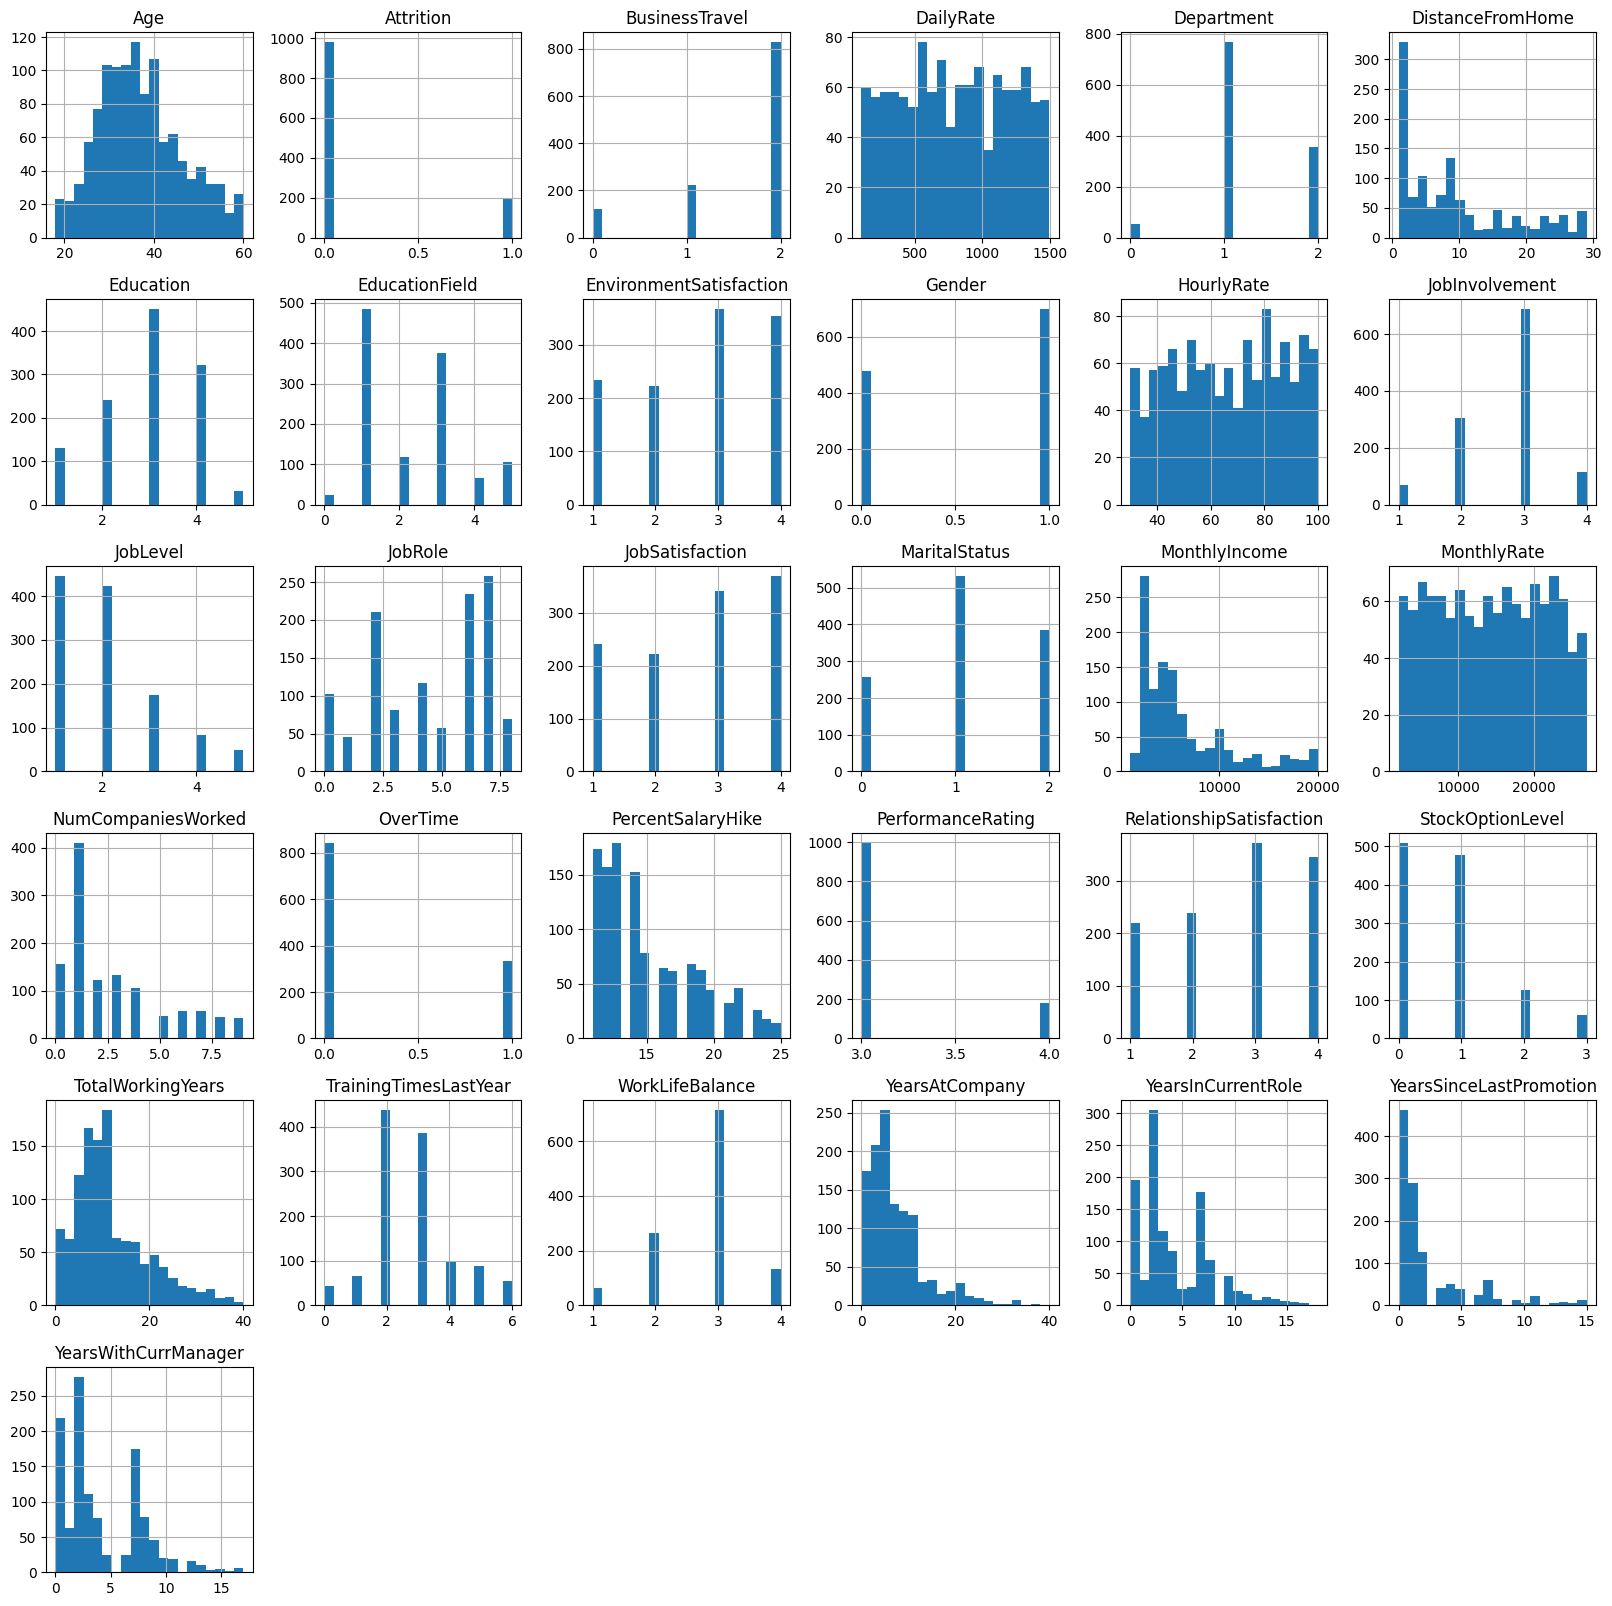

In [ ]:
#Distribuição de cada característica:
df.hist(bins=20, figsize=(20,20));

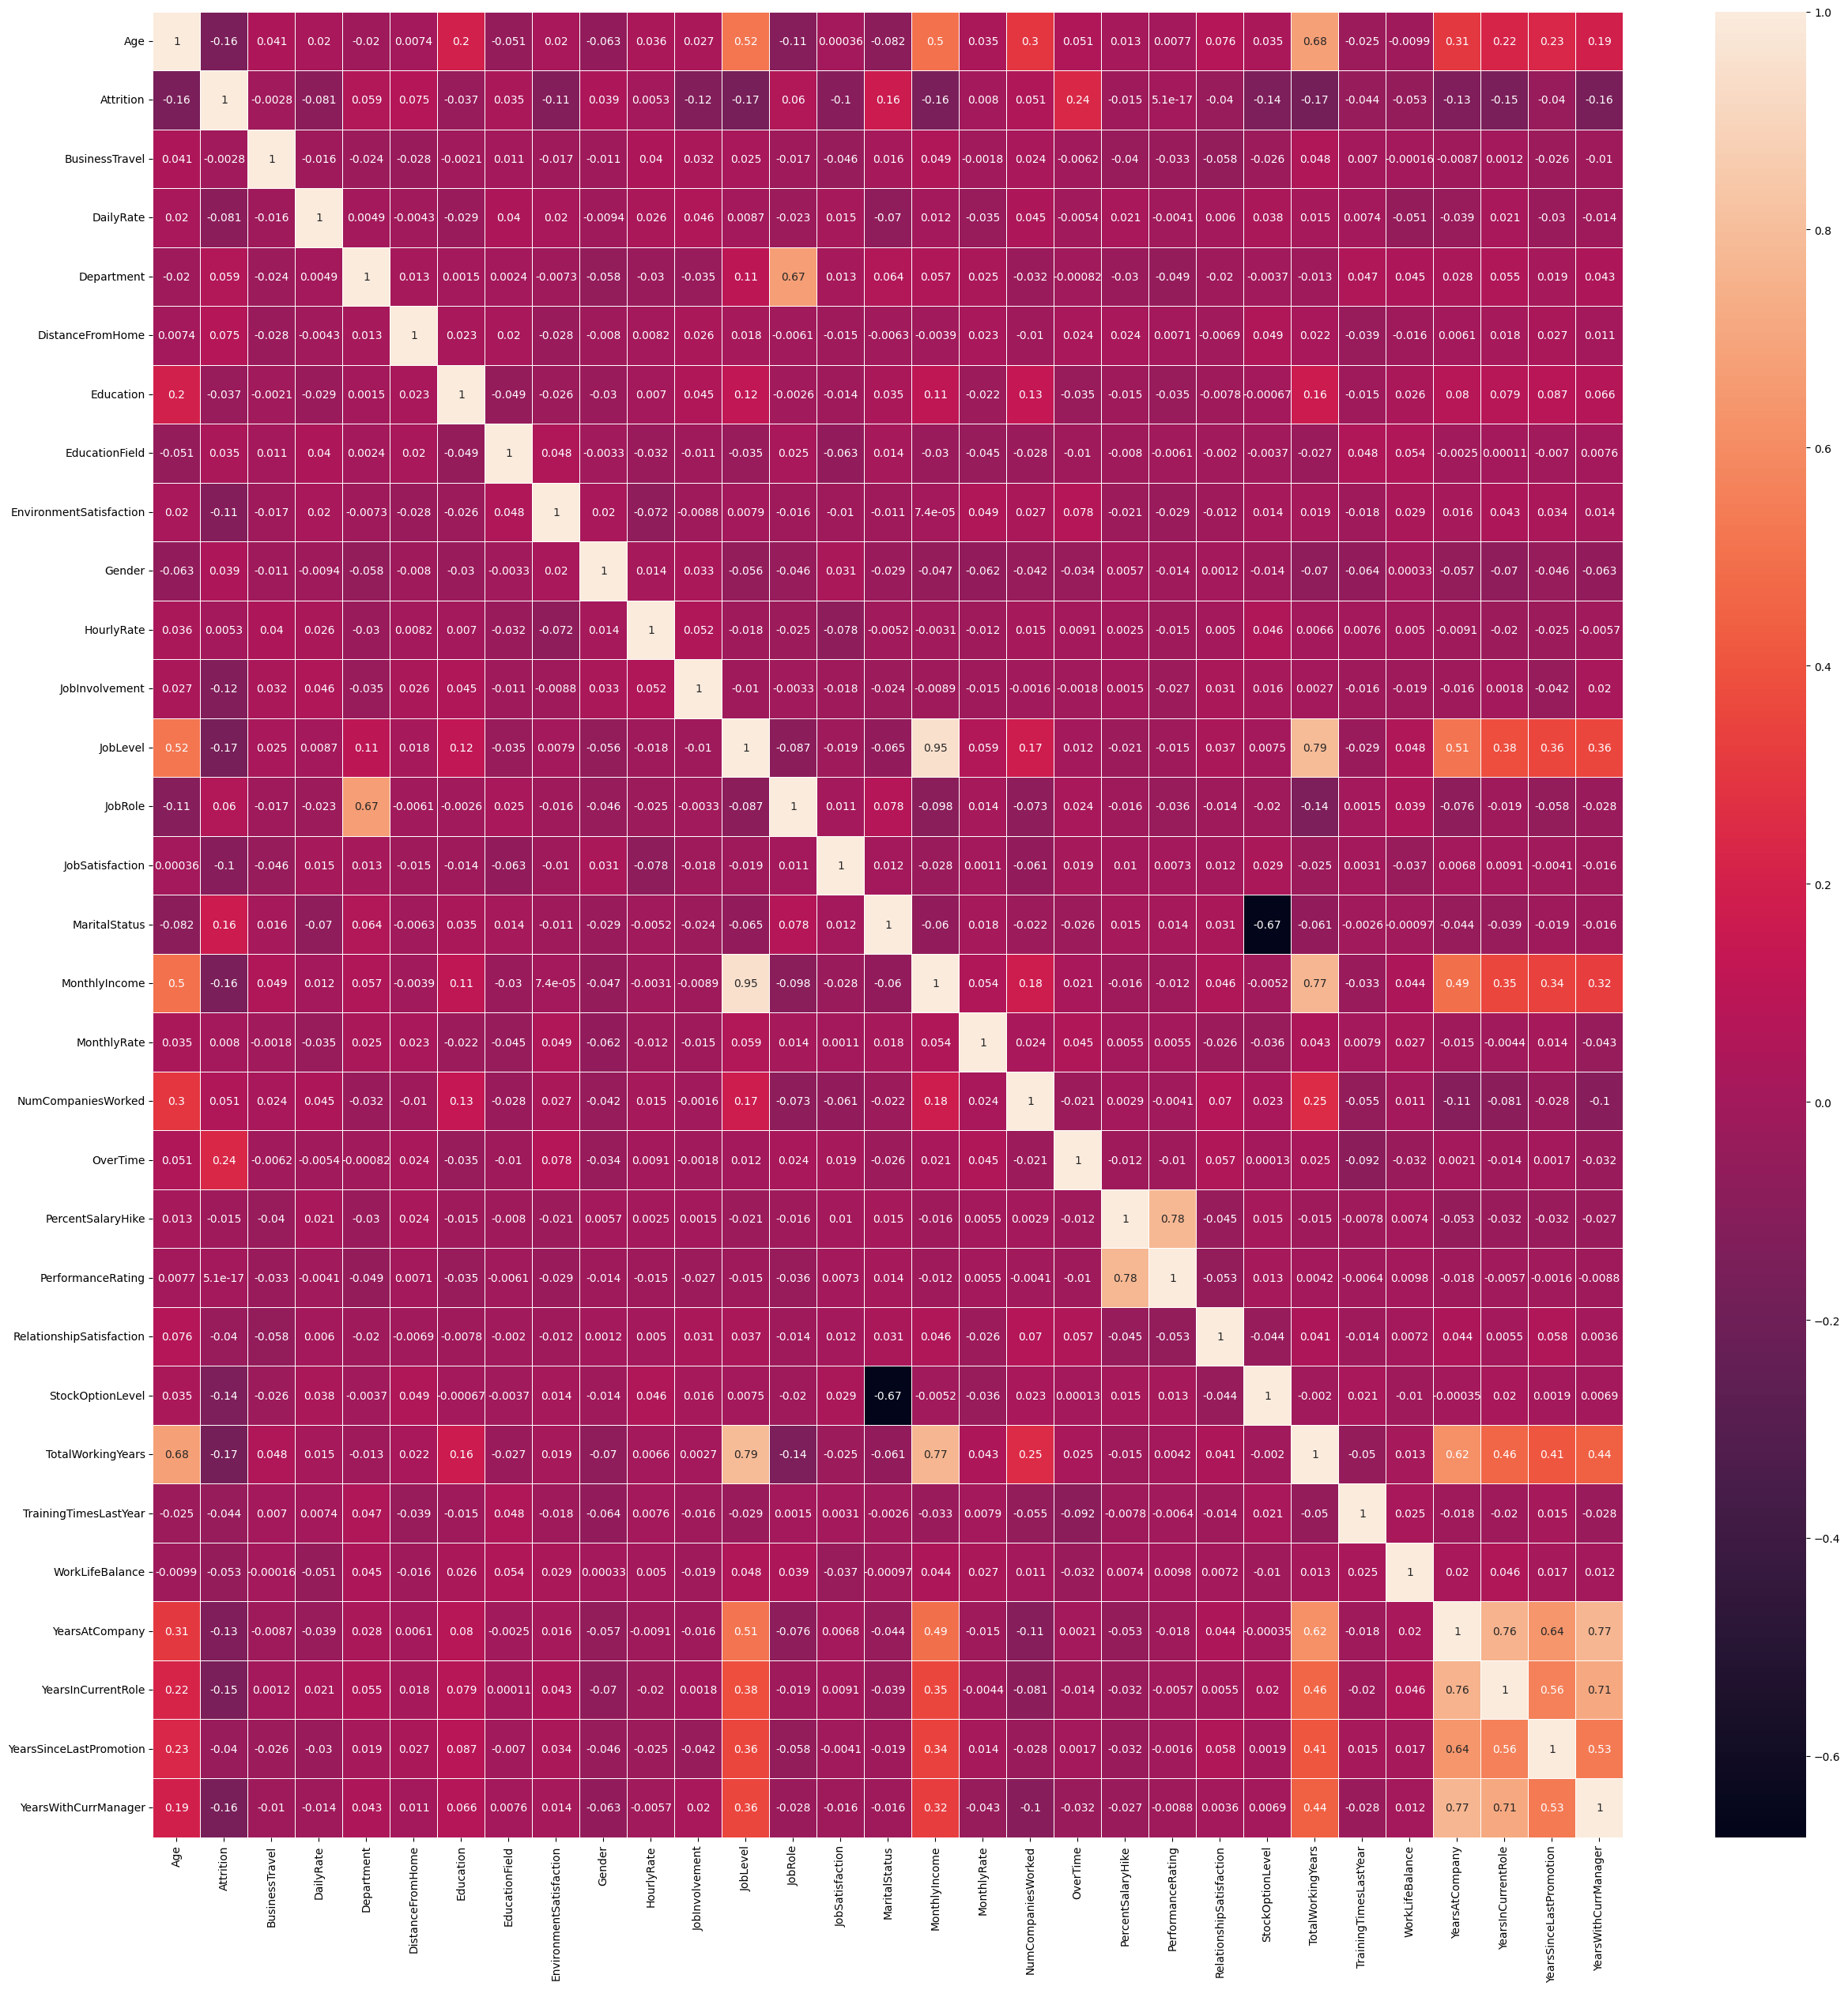

In [ ]:
#Buscando correlações lineares:
correlations = df.corr()
f, ax = plt.subplots(figsize=(30,30))
srn.heatmap(correlations, annot=True, linewidth=0.5);

Attrition não possui correlação linear forte com nenhuma característica

Correlações lineares fortes em:

1.   YearsWithCurrManager X YearsAtCompany
2.   YearsWithCurreManager X YearsInCurrRole
3.   YearsInCurrRole X YearsAtCompany
4.   TotalWorkingYears X JobLevel
5.   TotalWorkingYears X MonthlyIncome
6.   PerformanceRating X PercentSalaryHike
7.   MonthlyIncome X JobLevel



# Test F:

  Seleção de características

In [ ]:
from sklearn.feature_selection import f_classif
features_response = ["Age", "BusinessTravel", "DailyRate", "Department", "DistanceFromHome", "Education", "EducationField",
                     "EnvironmentSatisfaction", "Gender", "HourlyRate", "JobInvolvement", "JobLevel", "JobRole", "JobSatisfaction",
                     "MaritalStatus", "MonthlyIncome", "MonthlyRate", "NumCompaniesWorked", "OverTime", "PercentSalaryHike",
                     "PerformanceRating", "RelationshipSatisfaction", "StockOptionLevel", "TotalWorkingYears", "TrainingTimesLastYear",
                     "WorkLifeBalance", "YearsAtCompany", "YearsInCurrentRole", "YearsSinceLastPromotion", "YearsWithCurrManager"]
X_exp = df[features_response]

In [ ]:
y_exp = df["Attrition"]

In [ ]:
f_stat, f_p_value = f_classif(X_exp, y_exp)

In [ ]:
f_test_df = pd.DataFrame({"Feature":features_response,
                         "F statistic": f_stat,
                         "p value": f_p_value}
                         )

In [ ]:
f_test_df.sort_values("p value")

,Feature,F statistic,p value
18,OverTime,6.893084e+01,2.778168e-16
23,TotalWorkingYears,3.563711e+01,3.144872e-09
11,JobLevel,3.428089e+01,6.185065e-09
14,MaritalStatus,3.251949e+01,1.492053e-08
29,YearsWithCurrManager,3.186410e+01,2.071882e-08
0,Age,2.988263e+01,5.602893e-08
15,MonthlyIncome,2.984558e+01,5.708270e-08
27,YearsInCurrentRole,2.876886e+01,9.815974e-08
22,StockOptionLevel,2.396974e+01,1.115209e-06
26,YearsAtCompany,2.108044e+01,4.878191e-06


In [ ]:
#As possíveis melhores características preditivas são:
best_features = f_test_df.loc[f_test_df["p value"] <= 0.05, "Feature"]
best_features = best_features.tolist()
best_features

['Age',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'OverTime',
 'StockOptionLevel',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsWithCurrManager']

# Insights:

Hipóteses:
  
  1)
  
  H0: Não existe diferença significativa de "DistanceFromHome" entre os colaboradores que saíram e os que não saíram.
  
  Ha: Existe diferença significativa de "DistanceFromHome" entre os colaboradores que saíram e os que não saíram.
_____________________________________________________________________
  2)
  
  H0: Não existe diferença significativa de "Age" entre os colaboradores que saíram e os que não saíram.
  
  Ha: Existe diferença significativa de "Age" entre os colaboradores que saíram e os que não saíram.
_____________________________________________________________________
  3)
  
  H0: Não existe diferença significativa de "JobSatisfaction" entre os colaboradores que saíram e os que não saíram.

  Ha: Existe diferença significativa de "JobSatisfaction" entre os colaboradores que saíram e os que não saíram.
______________________________________________________________________
  4)
  
  H0: Não existe diferença significativa de "MonthlyIncome" entre os colaboradores que saíram e os que não saíram.
  
  Ha: Não existe diferença significativa de "MonthlyIncome" entre os colaboradores que saíram e os que não saíram.

In [ ]:
import scipy.stats as stats
from scipy.stats import mannwhitneyu, ttest_ind

df_y = df.loc[df["Attrition"] == 1]
df_n = df.loc[df["Attrition"] == 0]

df_y_test = df_y["DistanceFromHome"]
df_n_test = df_n["DistanceFromHome"]

## Shapiro wilk - verificar se é normal
def e_normal(group):
  wval, pval = stats.shapiro(group)
  if len(group) > 5000:
    if wval <0.05: return False
    if pval <0.05: return False
    return True
# equal variance test
def var_igual(group1,group2):
  _,pval = stats.levene(group1,group2)
  if pval<0.05: return False
  return True

# teste de hipótese
def stats_test(group1, group2):
  if e_normal(group1) and e_normal(group2):
    if var_igual(group1,group2):
      print("Realizando t-test...")
      return stats.ttest_ind(group1,group2)
    print("Realizando t-test com variancia diferente...")
    return stats.ttest_ind(group1,group2, equal_var = False)
  print("Realizando U-Test...")
  return mannwhitneyu(group1,group2)

##Testar Hipótese:
stats_test(df_y_test, df_n_test)

#pvaleu é menor que 0,05. Portante H0 é rejeitada e é aceita a Hipótese Alternativa ---> Existe uma diferença
#significativa de "DistanceFromHome" entre os dois grupos de colaboradores.

Realizando U-Test...


MannwhitneyuResult(statistic=106725.0, pvalue=0.013511920699046671)

In [ ]:
df_y_test = df_y["Age"]
df_n_test = df_n["Age"]

## Shapiro wilk - verificar se é normal
def e_normal(group):
  wval, pval = stats.shapiro(group)
  if len(group) > 5000:
    if wval <0.05: return False
    if pval < 0.05: return False
  return True
# equal variance test
def var_igual(group1,group2):
  _,pval = stats.levene(group1,group2)
  if pval<0.05: return False
  return True

# teste de hipótese
def stats_test(group1, group2):
  if e_normal(group1) and e_normal(group2):
    if var_igual(group1,group2):
      print("Realizando t-test...")
      return stats.ttest_ind(group1,group2)
    print("Relizando t-test com variancia diferente...")
    return stats.ttest_ind(group1,group2, equal_var = False)
  print("Realizando U-Test...")
  return mannwhitneyu(group1,group2)

##Testar Hipótese:
stats_test(df_y_test, df_n_test)

#pvaleu é menor que 0,05. Portante H0 é rejeitada e é aceita a Hipótese Alternativa ---> Existe uma diferença
#significativa de "Age" entre os dois grupos de colaboradores.

Realizando t-test...


TtestResult(statistic=-5.4665008389957555, pvalue=5.602892717417732e-08, df=1174.0)

In [ ]:
df_y_test = df_y["JobSatisfaction"]
df_n_test = df_n["JobSatisfaction"]

## Shapiro wilk - verificar se é normal
def e_normal(group):
  wval, pval = stats.shapiro(group)
  if len(group) > 5000:
    if wval <0.05: return False
    if pval < 0.05: return False
  return True
# equal variance test
def var_igual(group1,group2):
  _,pval = stats.levene(group1,group2)
  if pval<0.05: return False
  return True

# teste de hipótese
def stats_test(group1, group2):
  if e_normal(group1) and e_normal(group2):
    if var_igual(group1,group2):
      print("Realizando t-test...")
      return stats.ttest_ind(group1,group2)
    print("Relizando t-test com variancia diferente...")
    return stats.ttest_ind(group1,group2, equal_var = False)
  print("Realizando U-Test...")
  return mannwhitneyu(group1,group2)

##Testar Hipótese:
stats_test(df_y_test, df_n_test)

#pvaleu é menor que 0,05. Portante H0 é rejeitada e é aceita a Hipótese Alternativa ---> Existe uma diferença
#significativa de "JobSatisfaction" entre os dois grupos de colaboradores.

Relizando t-test com variancia diferente...


TtestResult(statistic=-3.5119059900719716, pvalue=0.000520503482518067, df=272.73935674930544)

In [ ]:
df_y_test = df_y["MonthlyIncome"]
df_n_test = df_n["MonthlyIncome"]

## Shapiro wilk - verificar se é normal
def e_normal(group):
  wval, pval = stats.shapiro(group)
  if len(group) > 5000:
    if wval <0.05: return False
    if pval < 0.05: return False
  return True
# equal variance test
def var_igual(group1,group2):
  _,pval = stats.levene(group1,group2)
  if pval<0.05: return False
  return True

# teste de hipótese
def stats_test(group1, group2):
  if e_normal(group1) and e_normal(group2):
    if var_igual(group1,group2):
      print("Realizando t-test...")
      return stats.ttest_ind(group1,group2)
    print("Relizando t-test com variancia diferente...")
    return stats.ttest_ind(group1,group2, equal_var = False)
  print("Realizando U-Test...")
  return mannwhitneyu(group1,group2)

##Testar Hipótese:
stats_test(df_y_test, df_n_test)

#pvaleu é menor que 0,05. Portante H0 é rejeitada e é aceita a Hipótese Alternativa ---> Existe uma diferença
#significativa de "MonthlyIncome" entre os dois grupos de colaboradores.

Relizando t-test com variancia diferente...


TtestResult(statistic=-6.378850713734996, pvalue=5.969123181692671e-10, df=332.87508453803787)

# Pipelines e preprocessamentos:

In [ ]:
carac_num_most_freq = ["Age", "DistanceFromHome", "Education", "EnvironmentSatisfaction", "JobInvolvement", "JobLevel",
                       "JobSatisfaction", "NumCompaniesWorked", "PercentSalaryHike", "PerformanceRating", "RelationshipSatisfaction",
                       "StockOptionLevel", "TrainingTimesLastYear", "WorkLifeBalance", "YearsAtCompany",
                       "YearsInCurrentRole", "YearsSinceLastPromotion", "YearsWithCurrManager"]
carac_num_most_freq_best_features = ["Age", "DistanceFromHome", "EnvironmentSatisfaction", "JobInvolvement", "JobLevel",
                                    "JobSatisfaction", "StockOptionLevel", "YearsAtCompany", "YearsInCurrentRole",
                                    "YearsWithCurrManager"]


Pipeline:


1.   SimpleImputer(strategy="most frequent")
2.   StandardScaler



In [ ]:
carac_num_mean = ["DailyRate", "HourlyRate", "MonthlyIncome", "MonthlyRate", "TotalWorkingYears"]
carac_num_mean_best_features = ["DailyRate", "MonthlyIncome", "TotalWorkingYears"]

Pipeline:


1.   SimpleImputer(strategy="mean")
2.   StandardScaler



In [ ]:
carac_cat_most_freq = ["BusinessTravel", "Department", "EducationField", "Gender", "JobRole", "MaritalStatus", "OverTime"]
carac_cat_most_freq_best_features = ["Department", "JobRole", "MaritalStatus", "OverTime"]

Pipeline:


1.   SimpleImputer(strategy="most frequent")
2.   OneHotEncoder()



In [ ]:
carac_labels = ["Attrition"]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1176 entries, 819 to 795
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1176 non-null   int64
 1   Attrition                 1176 non-null   int64
 2   BusinessTravel            1176 non-null   int64
 3   DailyRate                 1176 non-null   int64
 4   Department                1176 non-null   int64
 5   DistanceFromHome          1176 non-null   int64
 6   Education                 1176 non-null   int64
 7   EducationField            1176 non-null   int64
 8   EnvironmentSatisfaction   1176 non-null   int64
 9   Gender                    1176 non-null   int64
 10  HourlyRate                1176 non-null   int64
 11  JobInvolvement            1176 non-null   int64
 12  JobLevel                  1176 non-null   int64
 13  JobRole                   1176 non-null   int64
 14  JobSatisfaction           1176 non-null

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

num_pipeline_mean = Pipeline([
    ("imputer_mean", SimpleImputer(strategy="median")),
    ("std_scaler", MinMaxScaler())
])

num_pipeline_most_frequent = Pipeline([
    ("imputer_mf", SimpleImputer(strategy="most_frequent")),
    ("std_scaler", MinMaxScaler())
])

cat_pipeline_most_frequent = Pipeline([
    ("imputer_mf", SimpleImputer(strategy="most_frequent")),
    ("OHE", OneHotEncoder())
])

full_pipeline = ColumnTransformer([
    ("num_mean", num_pipeline_mean, carac_num_mean),
    ("num_mf", num_pipeline_most_frequent, carac_num_most_freq),
    ("cat_mf", cat_pipeline_most_frequent, carac_cat_most_freq),
])

full_pipeline_best_features = ColumnTransformer([
    ("num_mean", num_pipeline_mean, carac_num_mean_best_features),
    ("num_mf", num_pipeline_most_frequent, carac_num_most_freq_best_features),
    ("cat_mf", cat_pipeline_most_frequent, carac_cat_most_freq_best_features),
])

df_prepared = full_pipeline.fit_transform(df)
df_prepared = pd.DataFrame(df_prepared)
df_prepared

df_prepared_best_features = full_pipeline_best_features.fit_transform(df)
df_prepared_best_features = pd.DataFrame(df_prepared_best_features)
df_prepared_best_features

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,0.965641,0.113624,0.150,0.238095,0.035714,0.000000,0.333333,0.00,0.333333,0.000000,0.125,0.166667,0.235294,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.226915,0.056548,0.025,0.023810,0.714286,1.000000,0.333333,0.00,0.333333,0.000000,0.025,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,0.675018,0.494081,0.350,0.333333,0.107143,1.000000,0.000000,0.50,1.000000,0.000000,0.350,0.444444,0.470588,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.881174,0.662245,0.375,0.476190,0.000000,1.000000,0.666667,0.50,0.000000,0.333333,0.375,0.666667,0.647059,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.506084,0.757214,0.575,0.738095,0.000000,0.666667,0.666667,0.75,0.666667,0.000000,0.200,0.388889,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,0.071582,0.011098,0.025,0.309524,0.250000,0.000000,0.333333,0.00,0.333333,0.000000,0.025,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1172,0.073014,0.080753,0.200,0.380952,0.464286,0.666667,0.666667,0.00,0.666667,0.666667,0.200,0.111111,0.352941,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1173,0.292770,0.287972,0.225,0.214286,0.035714,0.000000,1.000000,0.25,0.666667,0.000000,0.200,0.388889,0.411765,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1174,0.732283,0.208857,0.250,0.309524,0.000000,1.000000,0.000000,0.25,0.000000,0.000000,0.250,0.444444,0.411765,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


#Validação cruzada - Teste de modelos sem seleção de características:

Para efeito de comparação, irei treinar modelos com seleção de características e sem. Nessa etapa, são os modelos sem seleção de características.

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import seaborn as srn

[[944  36]
 [130  66]]
0.8223708871303624


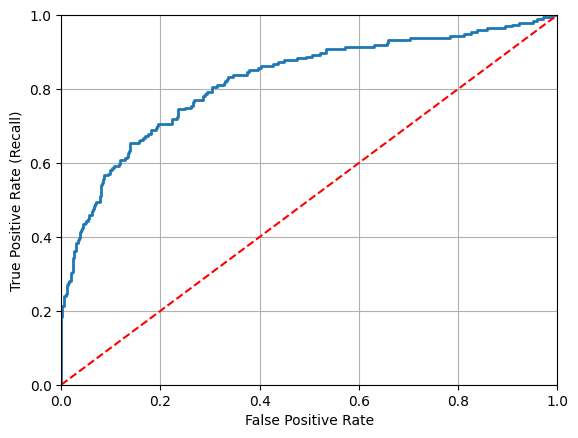

In [ ]:
#LogisticRegression:
log_reg = LogisticRegression()

y_train_pred_log_reg = cross_val_predict(log_reg, df_prepared, df_labels_encoded,
                                         cv=2)
confusao = confusion_matrix(df_labels_encoded, y_train_pred_log_reg)
print(confusao)


y_train_pred_log_reg = cross_val_predict(log_reg, df_prepared, df_labels_encoded,
                                         cv=3, method="decision_function")
print(roc_auc_score(df_labels_encoded, y_train_pred_log_reg))

fpr_log, tpr_log, thresholds_log = roc_curve(df_labels_encoded, y_train_pred_log_reg)
plt.plot(fpr_log, tpr_log, linewidth=2)
plt.plot([0,1], [0,1], "r--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.axis([0,1,0,1])
plt.grid(True)

[[897  83]
 [110  86]]
0.7638119533527697


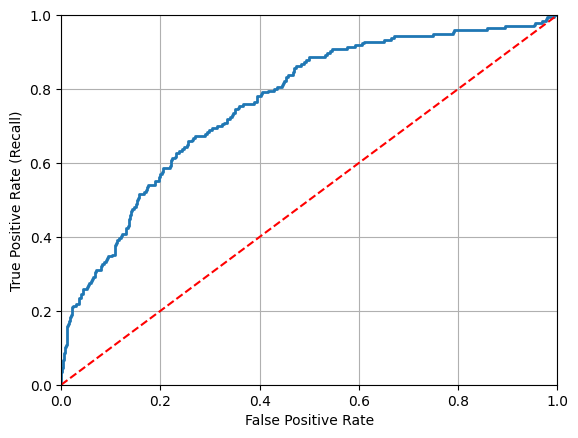

In [ ]:
#SGDClassifier:
SGD = SGDClassifier()

y_train_pred_SGD = cross_val_predict(SGD, df_prepared, df_labels_encoded,
                                         cv=2)
confusao = confusion_matrix(df_labels_encoded, y_train_pred_SGD)
print(confusao)


y_train_pred_SGD = cross_val_predict(SGD, df_prepared, df_labels_encoded,
                                         cv=3, method="decision_function")
roc_auc_score(df_labels_encoded, y_train_pred_SGD)
print(roc_auc_score(df_labels_encoded, y_train_pred_SGD))

fpr_sgd, tpr_sgd, thresholds_sgd = roc_curve(df_labels_encoded, y_train_pred_SGD)
plt.plot(fpr_sgd, tpr_sgd, linewidth=2)
plt.plot([0,1], [0,1], "r--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.axis([0,1,0,1])
plt.grid(True)


[[973   7]
 [162  34]]
0.7747995626822157


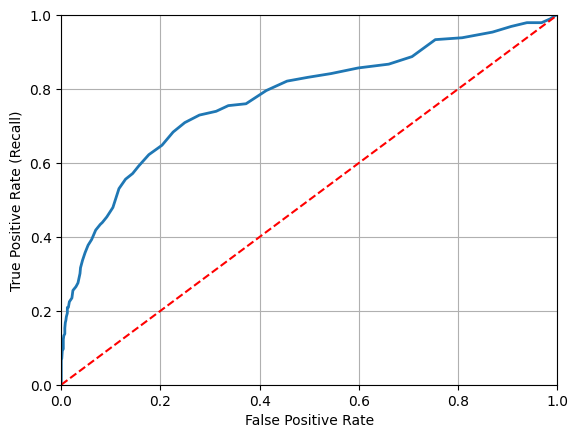

In [ ]:
#RandomForestClassifier:
forest = RandomForestClassifier()
y_train_pred_forest = cross_val_predict(forest, df_prepared, df_labels_encoded,
                                         cv=2)
confusao = confusion_matrix(df_labels_encoded, y_train_pred_forest)
print(confusao)


y_train_pred_forest = cross_val_predict(forest, df_prepared, df_labels_encoded,
                                         cv=3, method="predict_proba")
y_train_pred_forest = pd.DataFrame(y_train_pred_forest)
y_train_pred_forest = y_train_pred_forest.loc[:,1]
print(roc_auc_score(df_labels_encoded, y_train_pred_forest))

fpr_forest, tpr_forest, thresholds_forest = roc_curve(df_labels_encoded, y_train_pred_forest)
plt.plot(fpr_forest, tpr_forest, linewidth=2)
plt.plot([0,1], [0,1], "r--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.axis([0,1,0,1])
plt.grid(True)


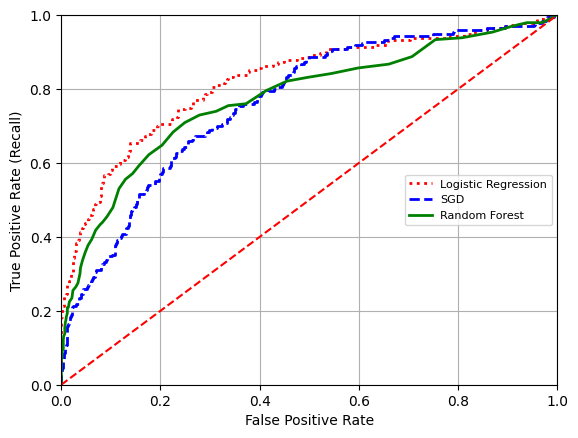

In [ ]:
#Comparação entre modelos:
plt.plot(fpr_log, tpr_log, "r:", linewidth=2, label="Logistic Regression")
plt.plot(fpr_sgd, tpr_sgd, "b--", linewidth=2, label="SGD")
plt.plot(fpr_forest, tpr_forest, "g-", linewidth=2, label="Random Forest")
plt.plot([0,1,0,1], "r--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.legend(loc="center right", fontsize=8)
plt.grid(True)
plt.axis([0,1,0,1]);

# GridSearch:

In [ ]:
#Logistic Regression:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "C": [0.01, 0.1, 1, 2],
    "solver": ["lbfgs", "liblinear"],
}
grid_search = GridSearchCV(log_reg, param_grid, cv=3,
                         scoring="roc_auc", return_train_score=True)
grid_search.fit(df_prepared, df_labels_encoded)

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 2],
                         'solver': ['lbfgs', 'liblinear']},
             return_train_score=True, scoring='roc_auc')

In [ ]:
grid_search.best_params_

{'C': 2, 'solver': 'lbfgs'}

[[954  26]
 [127  69]]
0.8219648063306955


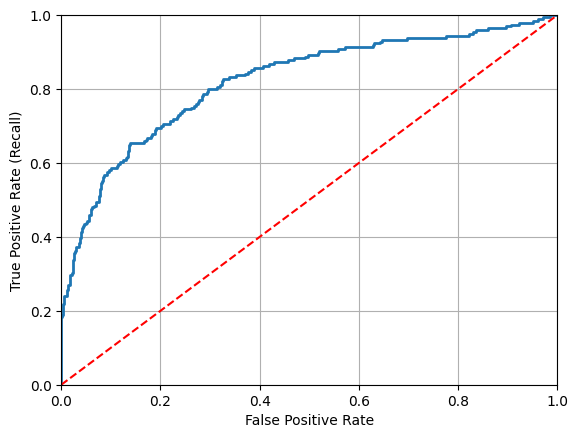

In [ ]:
log_reg = LogisticRegression(solver="liblinear")

y_train_pred_log_reg = cross_val_predict(log_reg, df_prepared, df_labels_encoded,
                                         cv=3)
confusao = confusion_matrix(df_labels_encoded, y_train_pred_log_reg)
print(confusao)


y_train_pred_log_reg = cross_val_predict(log_reg, df_prepared, df_labels_encoded,
                                         cv=3, method="decision_function")
print(roc_auc_score(df_labels_encoded, y_train_pred_log_reg))

fpr_log, tpr_log, thresholds_log = roc_curve(df_labels_encoded, y_train_pred_log_reg)
plt.plot(fpr_log, tpr_log, linewidth=2)
plt.plot([0,1], [0,1], "r--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.axis([0,1,0,1])
plt.grid(True)

In [ ]:
param_grid = {
    "C": [0.01, 0.1, 1, 2],
    "solver": ["lbfgs", "liblinear"],
}
grid_search = GridSearchCV(log_reg, param_grid, cv=3,
                         scoring="roc_auc", return_train_score=True)
grid_search.fit(df_prepared, df_labels_encoded)

GridSearchCV(cv=3, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [0.01, 0.1, 1, 2],
                         'solver': ['lbfgs', 'liblinear']},
             return_train_score=True, scoring='roc_auc')

In [ ]:
#Random Forest:

param_grid = {
    "n_estimators": [1, 10, 20, 50, 100],
    "max_features": [6, 8, 10, 12, 14, 16, 18, 20],
}
grid_search = GridSearchCV(forest, param_grid, cv=3,
                         scoring="roc_auc", return_train_score=True)
grid_search.fit(df_prepared, df_labels_encoded)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_features': [6, 8, 10, 12, 14, 16, 18, 20],
                         'n_estimators': [1, 10, 20, 50, 100]},
             return_train_score=True, scoring='roc_auc')

In [ ]:
grid_search.best_params_

{'max_features': 10, 'n_estimators': 100}

[[966  14]
 [159  37]]
0.7773427738442316


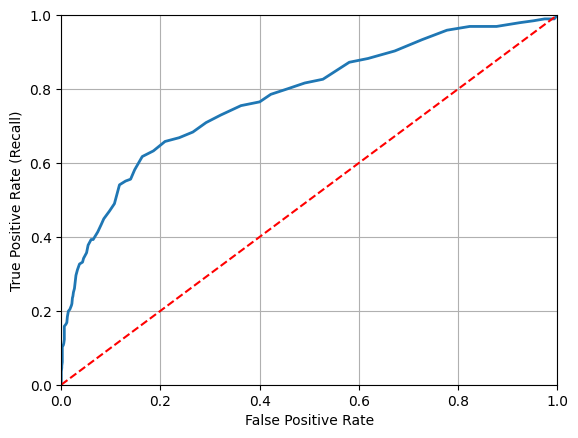

In [ ]:
forest = RandomForestClassifier(max_features=grid_search.best_params_["max_features"],
                                n_estimators=grid_search.best_params_["n_estimators"])
y_train_pred_forest = cross_val_predict(forest, df_prepared, df_labels_encoded,
                                         cv=3)
confusao = confusion_matrix(df_labels_encoded, y_train_pred_forest)
print(confusao)


y_train_pred_forest = cross_val_predict(forest, df_prepared, df_labels_encoded,
                                         cv=3, method="predict_proba")
y_train_pred_forest = pd.DataFrame(y_train_pred_forest)
y_train_pred_forest = y_train_pred_forest.loc[:,1]
print(roc_auc_score(df_labels_encoded, y_train_pred_forest))

fpr_forest, tpr_forest, thresholds_forest = roc_curve(df_labels_encoded, y_train_pred_forest)
plt.plot(fpr_forest, tpr_forest, linewidth=2)
plt.plot([0,1], [0,1], "r--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.axis([0,1,0,1])
plt.grid(True)

#Validação cruzada - Teste de modelos sem seleção de características:

[[961  19]
 [145  51]]
0.7970376926280716


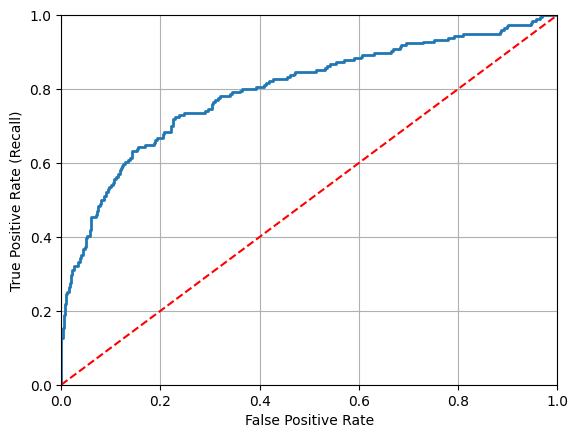

In [ ]:
#LogisticRegression:
log_reg = LogisticRegression(solver="liblinear")

y_train_pred_log_reg = cross_val_predict(log_reg, df_prepared_best_features, df_labels_encoded,
                                         cv=2)
confusao = confusion_matrix(df_labels_encoded, y_train_pred_log_reg)
print(confusao)


y_train_pred_log_reg = cross_val_predict(log_reg, df_prepared_best_features, df_labels_encoded,
                                         cv=3, method="decision_function")
print(roc_auc_score(df_labels_encoded, y_train_pred_log_reg))

fpr_log, tpr_log, thresholds_log = roc_curve(df_labels_encoded, y_train_pred_log_reg)
plt.plot(fpr_log, tpr_log, linewidth=2)
plt.plot([0,1], [0,1], "r--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.axis([0,1,0,1])
plt.grid(True)

[[950  30]
 [149  47]]
0.7737114743856724


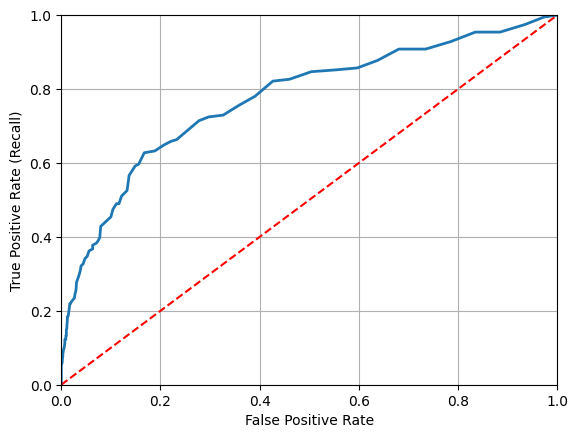

In [ ]:
#RandomForest:
forest = RandomForestClassifier(max_features=grid_search.best_params_["max_features"],
                                n_estimators=grid_search.best_params_["n_estimators"])
y_train_pred_forest = cross_val_predict(forest, df_prepared_best_features, df_labels_encoded,
                                         cv=3)
confusao = confusion_matrix(df_labels_encoded, y_train_pred_forest)
print(confusao)


y_train_pred_forest = cross_val_predict(forest, df_prepared_best_features, df_labels_encoded,
                                         cv=3, method="predict_proba")
y_train_pred_forest = pd.DataFrame(y_train_pred_forest)
y_train_pred_forest = y_train_pred_forest.loc[:,1]
print(roc_auc_score(df_labels_encoded, y_train_pred_forest))

fpr_forest, tpr_forest, thresholds_forest = roc_curve(df_labels_encoded, y_train_pred_forest)
plt.plot(fpr_forest, tpr_forest, linewidth=2)
plt.plot([0,1], [0,1], "r--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.axis([0,1,0,1])
plt.grid(True)